<a href="https://colab.research.google.com/github/ajayks1974/learning/blob/master/fds/fds_wk11_visualization_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
sns.set(color_codes=True)

#Tabulation

In [89]:
url = 'https://api.covid19india.org/states_daily.json'

In [90]:
import urllib.request

In [91]:
urllib.request.urlretrieve(url,'covid_data.json')

('covid_data.json', <http.client.HTTPMessage at 0x7f51305c6160>)

In [92]:
covid_data = pd.read_json('covid_data.json')

In [93]:
covid_data

,states_daily
0,"{'an': '0', 'ap': '1', 'ar': '0', 'as': '0', '..."
1,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
2,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
3,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
4,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
...,...
457,"{'an': '95', 'ap': '9499', 'ar': '59', 'as': '..."
458,"{'an': '1', 'ap': '82', 'ar': '1', 'as': '8', ..."
459,"{'an': '149', 'ap': '8943', 'ar': '95', 'as': ..."
460,"{'an': '108', 'ap': '9779', 'ar': '32', 'as': ..."


In [94]:
import json

In [95]:
with open('covid_data.json') as f:
    data = json.load(f)
data

{'states_daily': [{'an': '0',
   'ap': '1',
   'ar': '0',
   'as': '0',
   'br': '0',
   'ch': '0',
   'ct': '0',
   'date': '14-Mar-20',
   'dd': '0',
   'dl': '7',
   'dn': '0',
   'ga': '0',
   'gj': '0',
   'hp': '0',
   'hr': '14',
   'jh': '0',
   'jk': '2',
   'ka': '6',
   'kl': '19',
   'la': '0',
   'ld': '0',
   'mh': '14',
   'ml': '0',
   'mn': '0',
   'mp': '0',
   'mz': '0',
   'nl': '0',
   'or': '0',
   'pb': '1',
   'py': '0',
   'rj': '3',
   'sk': '0',
   'status': 'Confirmed',
   'tg': '1',
   'tn': '1',
   'tr': '0',
   'tt': '81',
   'un': '0',
   'up': '12',
   'ut': '0',
   'wb': '0'},
  {'an': '0',
   'ap': '0',
   'ar': '0',
   'as': '0',
   'br': '0',
   'ch': '0',
   'ct': '0',
   'date': '14-Mar-20',
   'dd': '0',
   'dl': '1',
   'dn': '0',
   'ga': '0',
   'gj': '0',
   'hp': '0',
   'hr': '0',
   'jh': '0',
   'jk': '0',
   'ka': '0',
   'kl': '3',
   'la': '0',
   'ld': '0',
   'mh': '0',
   'ml': '0',
   'mn': '0',
   'mp': '0',
   'mz': '0',
   'nl':

In [96]:
data = data['states_daily']

In [97]:
print(type(data))

<class 'list'>


In [98]:
covid_data = pd.json_normalize(data)

In [99]:
covid_data

,an,ap,ar,as,br,ch,ct,date,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,95,9499,59,2174,2439,53,150,13-Aug-20,0,913,38,271,1046,73,792,816,779,8609,766,8,0,9115,30,64,596,13,26,1422,627,152,171,31,Recovered,1780,5146,74,54776,0,4125,327,2497
458,1,82,1,8,10,1,8,13-Aug-20,0,14,0,2,18,1,8,7,11,103,3,0,0,413,0,1,17,0,0,9,31,6,11,0,Deceased,11,119,1,1006,0,50,3,56
459,149,8943,95,2706,3911,86,529,14-Aug-20,0,1192,41,476,1087,58,797,1175,540,7908,1569,30,0,12608,35,86,796,8,154,1977,1077,315,1278,149,Confirmed,1921,5890,164,65610,0,4512,313,3035
460,108,9779,32,2310,2800,15,199,14-Aug-20,0,790,31,245,1083,116,862,665,640,6940,1304,21,0,10484,34,65,570,4,59,1305,489,181,2078,42,Recovered,1210,5556,103,56920,0,3740,488,2572


In [100]:
df = covid_data

In [101]:
df.date

0      14-Mar-20
1      14-Mar-20
2      14-Mar-20
3      15-Mar-20
4      15-Mar-20
         ...    
457    13-Aug-20
458    13-Aug-20
459    14-Aug-20
460    14-Aug-20
461    14-Aug-20
Name: date, Length: 462, dtype: object

In [102]:
df.date = pd.to_datetime(df.date)

In [103]:
df.date

0     2020-03-14
1     2020-03-14
2     2020-03-14
3     2020-03-15
4     2020-03-15
         ...    
457   2020-08-13
458   2020-08-13
459   2020-08-14
460   2020-08-14
461   2020-08-14
Name: date, Length: 462, dtype: datetime64[ns]

In [104]:
df = df[df.status == 'Confirmed']

In [105]:
df.drop('status', axis = 1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [106]:
df.set_index('date', inplace=True)

In [107]:
df

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-14,0,1,0,0,0,0,0,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,1,1,0,81,0,12,0,0
2020-03-15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,2,0,0,27,0,1,0,0
2020-03-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,0,0,6,0,0,0,0,0,1,0,1,0,0,1,0,0,15,0,0,1,0
2020-03-17,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,11,0,2,0,1
2020-03-18,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,1,5,0,8,0,3,0,0,0,0,0,1,1,0,3,0,8,1,0,37,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-10,135,7665,76,2900,3021,80,477,0,707,62,317,1056,92,794,630,470,4267,1184,29,0,9181,53,100,866,12,230,1528,986,242,1173,44,1256,5914,62,53016,0,4113,389,2905
2020-08-11,139,9024,96,2669,4071,75,360,0,1257,39,415,1118,34,798,683,564,6257,1417,53,0,11088,27,88,843,3,20,1341,1000,276,1217,3,1896,5834,164,61252,0,5041,411,2931
2020-08-12,136,9597,103,4593,3741,81,567,0,1113,39,480,1152,139,797,788,482,7883,1212,41,0,12712,37,41,870,25,87,1876,1020,481,1213,17,1897,5871,110,67066,0,4475,454,2936


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 154 entries, 2020-03-14 to 2020-08-14
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   an      154 non-null    object
 1   ap      154 non-null    object
 2   ar      154 non-null    object
 3   as      154 non-null    object
 4   br      154 non-null    object
 5   ch      154 non-null    object
 6   ct      154 non-null    object
 7   dd      154 non-null    object
 8   dl      154 non-null    object
 9   dn      154 non-null    object
 10  ga      154 non-null    object
 11  gj      154 non-null    object
 12  hp      154 non-null    object
 13  hr      154 non-null    object
 14  jh      154 non-null    object
 15  jk      154 non-null    object
 16  ka      154 non-null    object
 17  kl      154 non-null    object
 18  la      154 non-null    object
 19  ld      154 non-null    object
 20  mh      154 non-null    object
 21  ml      154 non-null    object
 22  mn     

In [109]:
pd.to_numeric(df.tn)

date
2020-03-14       1
2020-03-15       0
2020-03-16       0
2020-03-17       0
2020-03-18       1
              ... 
2020-08-10    5914
2020-08-11    5834
2020-08-12    5871
2020-08-13    5835
2020-08-14    5890
Name: tn, Length: 154, dtype: int64

In [110]:
df = df.apply(pd.to_numeric)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 154 entries, 2020-03-14 to 2020-08-14
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   an      154 non-null    int64
 1   ap      154 non-null    int64
 2   ar      154 non-null    int64
 3   as      154 non-null    int64
 4   br      154 non-null    int64
 5   ch      154 non-null    int64
 6   ct      154 non-null    int64
 7   dd      154 non-null    int64
 8   dl      154 non-null    int64
 9   dn      154 non-null    int64
 10  ga      154 non-null    int64
 11  gj      154 non-null    int64
 12  hp      154 non-null    int64
 13  hr      154 non-null    int64
 14  jh      154 non-null    int64
 15  jk      154 non-null    int64
 16  ka      154 non-null    int64
 17  kl      154 non-null    int64
 18  la      154 non-null    int64
 19  ld      154 non-null    int64
 20  mh      154 non-null    int64
 21  ml      154 non-null    int64
 22  mn      154 non-null    int64
 

In [112]:
df.tail(7)

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-08,129,10080,68,2218,3992,52,447,0,1404,51,259,1101,114,789,986,463,7178,1420,25,0,12822,17,169,859,8,31,1643,998,261,1171,6,2256,5883,146,65156,0,4660,501,2949
2020-08-09,139,10820,38,1123,3934,89,293,0,1300,45,506,1078,107,792,688,507,5985,1211,49,0,12248,39,118,868,41,93,1734,975,259,1169,6,1982,5994,147,62117,0,4571,230,2939
2020-08-10,135,7665,76,2900,3021,80,477,0,707,62,317,1056,92,794,630,470,4267,1184,29,0,9181,53,100,866,12,230,1528,986,242,1173,44,1256,5914,62,53016,0,4113,389,2905
2020-08-11,139,9024,96,2669,4071,75,360,0,1257,39,415,1118,34,798,683,564,6257,1417,53,0,11088,27,88,843,3,20,1341,1000,276,1217,3,1896,5834,164,61252,0,5041,411,2931
2020-08-12,136,9597,103,4593,3741,81,567,0,1113,39,480,1152,139,797,788,482,7883,1212,41,0,12712,37,41,870,25,87,1876,1020,481,1213,17,1897,5871,110,67066,0,4475,454,2936
2020-08-13,137,9996,82,2796,3906,91,478,0,956,46,570,1092,180,793,693,536,6706,1564,38,0,11813,14,130,1014,1,50,1981,1027,299,1314,1,1931,5835,121,64141,0,4537,416,2997
2020-08-14,149,8943,95,2706,3911,86,529,0,1192,41,476,1087,58,797,1175,540,7908,1569,30,0,12608,35,86,796,8,154,1977,1077,315,1278,149,1921,5890,164,65610,0,4512,313,3035


##Styling Tabulation

In [113]:
df_t = df.tail(7)

In [ ]:
df_t.style

In [115]:
def color_red_negative(x):
    color = 'red' if x < 100 else 'white'
    return 'color: ' + color

In [116]:
color_red_negative(-1)

'color: red'

In [117]:
df_t.style.applymap(color_red_negative)

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-08 00:00:00,129,10080,68,2218,3992,52,447,0,1404,51,259,1101,114,789,986,463,7178,1420,25,0,12822,17,169,859,8,31,1643,998,261,1171,6,2256,5883,146,65156,0,4660,501,2949
2020-08-09 00:00:00,139,10820,38,1123,3934,89,293,0,1300,45,506,1078,107,792,688,507,5985,1211,49,0,12248,39,118,868,41,93,1734,975,259,1169,6,1982,5994,147,62117,0,4571,230,2939
2020-08-10 00:00:00,135,7665,76,2900,3021,80,477,0,707,62,317,1056,92,794,630,470,4267,1184,29,0,9181,53,100,866,12,230,1528,986,242,1173,44,1256,5914,62,53016,0,4113,389,2905
2020-08-11 00:00:00,139,9024,96,2669,4071,75,360,0,1257,39,415,1118,34,798,683,564,6257,1417,53,0,11088,27,88,843,3,20,1341,1000,276,1217,3,1896,5834,164,61252,0,5041,411,2931
2020-08-12 00:00:00,136,9597,103,4593,3741,81,567,0,1113,39,480,1152,139,797,788,482,7883,1212,41,0,12712,37,41,870,25,87,1876,1020,481,1213,17,1897,5871,110,67066,0,4475,454,2936
2020-08-13 00:00:00,137,9996,82,2796,3906,91,478,0,956,46,570,1092,180,793,693,536,6706,1564,38,0,11813,14,130,1014,1,50,1981,1027,299,1314,1,1931,5835,121,64141,0,4537,416,2997
2020-08-14 00:00:00,149,8943,95,2706,3911,86,529,0,1192,41,476,1087,58,797,1175,540,7908,1569,30,0,12608,35,86,796,8,154,1977,1077,315,1278,149,1921,5890,164,65610,0,4512,313,3035


In [118]:
df_t.style.highlight_max(color='red').highlight_min(color='green')

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-08 00:00:00,129,10080,68,2218,3992,52,447,0,1404,51,259,1101,114,789,986,463,7178,1420,25,0,12822,17,169,859,8,31,1643,998,261,1171,6,2256,5883,146,65156,0,4660,501,2949
2020-08-09 00:00:00,139,10820,38,1123,3934,89,293,0,1300,45,506,1078,107,792,688,507,5985,1211,49,0,12248,39,118,868,41,93,1734,975,259,1169,6,1982,5994,147,62117,0,4571,230,2939
2020-08-10 00:00:00,135,7665,76,2900,3021,80,477,0,707,62,317,1056,92,794,630,470,4267,1184,29,0,9181,53,100,866,12,230,1528,986,242,1173,44,1256,5914,62,53016,0,4113,389,2905
2020-08-11 00:00:00,139,9024,96,2669,4071,75,360,0,1257,39,415,1118,34,798,683,564,6257,1417,53,0,11088,27,88,843,3,20,1341,1000,276,1217,3,1896,5834,164,61252,0,5041,411,2931
2020-08-12 00:00:00,136,9597,103,4593,3741,81,567,0,1113,39,480,1152,139,797,788,482,7883,1212,41,0,12712,37,41,870,25,87,1876,1020,481,1213,17,1897,5871,110,67066,0,4475,454,2936
2020-08-13 00:00:00,137,9996,82,2796,3906,91,478,0,956,46,570,1092,180,793,693,536,6706,1564,38,0,11813,14,130,1014,1,50,1981,1027,299,1314,1,1931,5835,121,64141,0,4537,416,2997
2020-08-14 00:00:00,149,8943,95,2706,3911,86,529,0,1192,41,476,1087,58,797,1175,540,7908,1569,30,0,12608,35,86,796,8,154,1977,1077,315,1278,149,1921,5890,164,65610,0,4512,313,3035


In [119]:
df_t.drop('tt', axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [120]:
def bold_max_value(x):
    is_max = (x == x.max())
    return ['font-weight: bold' if y else ' ' for y in is_max]

In [121]:
df_t.style.apply(bold_max_value)

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-08 00:00:00,129,10080,68,2218,3992,52,447,0,1404,51,259,1101,114,789,986,463,7178,1420,25,0,12822,17,169,859,8,31,1643,998,261,1171,6,2256,5883,146,0,4660,501,2949
2020-08-09 00:00:00,139,10820,38,1123,3934,89,293,0,1300,45,506,1078,107,792,688,507,5985,1211,49,0,12248,39,118,868,41,93,1734,975,259,1169,6,1982,5994,147,0,4571,230,2939
2020-08-10 00:00:00,135,7665,76,2900,3021,80,477,0,707,62,317,1056,92,794,630,470,4267,1184,29,0,9181,53,100,866,12,230,1528,986,242,1173,44,1256,5914,62,0,4113,389,2905
2020-08-11 00:00:00,139,9024,96,2669,4071,75,360,0,1257,39,415,1118,34,798,683,564,6257,1417,53,0,11088,27,88,843,3,20,1341,1000,276,1217,3,1896,5834,164,0,5041,411,2931
2020-08-12 00:00:00,136,9597,103,4593,3741,81,567,0,1113,39,480,1152,139,797,788,482,7883,1212,41,0,12712,37,41,870,25,87,1876,1020,481,1213,17,1897,5871,110,0,4475,454,2936
2020-08-13 00:00:00,137,9996,82,2796,3906,91,478,0,956,46,570,1092,180,793,693,536,6706,1564,38,0,11813,14,130,1014,1,50,1981,1027,299,1314,1,1931,5835,121,0,4537,416,2997
2020-08-14 00:00:00,149,8943,95,2706,3911,86,529,0,1192,41,476,1087,58,797,1175,540,7908,1569,30,0,12608,35,86,796,8,154,1977,1077,315,1278,149,1921,5890,164,0,4512,313,3035


In [122]:
df_t.style.apply(bold_max_value).highlight_max(color='red',axis=1)

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-08 00:00:00,129,10080,68,2218,3992,52,447,0,1404,51,259,1101,114,789,986,463,7178,1420,25,0,12822,17,169,859,8,31,1643,998,261,1171,6,2256,5883,146,0,4660,501,2949
2020-08-09 00:00:00,139,10820,38,1123,3934,89,293,0,1300,45,506,1078,107,792,688,507,5985,1211,49,0,12248,39,118,868,41,93,1734,975,259,1169,6,1982,5994,147,0,4571,230,2939
2020-08-10 00:00:00,135,7665,76,2900,3021,80,477,0,707,62,317,1056,92,794,630,470,4267,1184,29,0,9181,53,100,866,12,230,1528,986,242,1173,44,1256,5914,62,0,4113,389,2905
2020-08-11 00:00:00,139,9024,96,2669,4071,75,360,0,1257,39,415,1118,34,798,683,564,6257,1417,53,0,11088,27,88,843,3,20,1341,1000,276,1217,3,1896,5834,164,0,5041,411,2931
2020-08-12 00:00:00,136,9597,103,4593,3741,81,567,0,1113,39,480,1152,139,797,788,482,7883,1212,41,0,12712,37,41,870,25,87,1876,1020,481,1213,17,1897,5871,110,0,4475,454,2936
2020-08-13 00:00:00,137,9996,82,2796,3906,91,478,0,956,46,570,1092,180,793,693,536,6706,1564,38,0,11813,14,130,1014,1,50,1981,1027,299,1314,1,1931,5835,121,0,4537,416,2997
2020-08-14 00:00:00,149,8943,95,2706,3911,86,529,0,1192,41,476,1087,58,797,1175,540,7908,1569,30,0,12608,35,86,796,8,154,1977,1077,315,1278,149,1921,5890,164,0,4512,313,3035


In [123]:
df_t.style.background_gradient(cmap='Reds',axis=1)

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-08 00:00:00,129,10080,68,2218,3992,52,447,0,1404,51,259,1101,114,789,986,463,7178,1420,25,0,12822,17,169,859,8,31,1643,998,261,1171,6,2256,5883,146,0,4660,501,2949
2020-08-09 00:00:00,139,10820,38,1123,3934,89,293,0,1300,45,506,1078,107,792,688,507,5985,1211,49,0,12248,39,118,868,41,93,1734,975,259,1169,6,1982,5994,147,0,4571,230,2939
2020-08-10 00:00:00,135,7665,76,2900,3021,80,477,0,707,62,317,1056,92,794,630,470,4267,1184,29,0,9181,53,100,866,12,230,1528,986,242,1173,44,1256,5914,62,0,4113,389,2905
2020-08-11 00:00:00,139,9024,96,2669,4071,75,360,0,1257,39,415,1118,34,798,683,564,6257,1417,53,0,11088,27,88,843,3,20,1341,1000,276,1217,3,1896,5834,164,0,5041,411,2931
2020-08-12 00:00:00,136,9597,103,4593,3741,81,567,0,1113,39,480,1152,139,797,788,482,7883,1212,41,0,12712,37,41,870,25,87,1876,1020,481,1213,17,1897,5871,110,0,4475,454,2936
2020-08-13 00:00:00,137,9996,82,2796,3906,91,478,0,956,46,570,1092,180,793,693,536,6706,1564,38,0,11813,14,130,1014,1,50,1981,1027,299,1314,1,1931,5835,121,0,4537,416,2997
2020-08-14 00:00:00,149,8943,95,2706,3911,86,529,0,1192,41,476,1087,58,797,1175,540,7908,1569,30,0,12608,35,86,796,8,154,1977,1077,315,1278,149,1921,5890,164,0,4512,313,3035


In [124]:
df_t.style.background_gradient(cmap='Reds',subset = ['mh', 'dl', 'tn'], axis=1)

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-08 00:00:00,129,10080,68,2218,3992,52,447,0,1404,51,259,1101,114,789,986,463,7178,1420,25,0,12822,17,169,859,8,31,1643,998,261,1171,6,2256,5883,146,0,4660,501,2949
2020-08-09 00:00:00,139,10820,38,1123,3934,89,293,0,1300,45,506,1078,107,792,688,507,5985,1211,49,0,12248,39,118,868,41,93,1734,975,259,1169,6,1982,5994,147,0,4571,230,2939
2020-08-10 00:00:00,135,7665,76,2900,3021,80,477,0,707,62,317,1056,92,794,630,470,4267,1184,29,0,9181,53,100,866,12,230,1528,986,242,1173,44,1256,5914,62,0,4113,389,2905
2020-08-11 00:00:00,139,9024,96,2669,4071,75,360,0,1257,39,415,1118,34,798,683,564,6257,1417,53,0,11088,27,88,843,3,20,1341,1000,276,1217,3,1896,5834,164,0,5041,411,2931
2020-08-12 00:00:00,136,9597,103,4593,3741,81,567,0,1113,39,480,1152,139,797,788,482,7883,1212,41,0,12712,37,41,870,25,87,1876,1020,481,1213,17,1897,5871,110,0,4475,454,2936
2020-08-13 00:00:00,137,9996,82,2796,3906,91,478,0,956,46,570,1092,180,793,693,536,6706,1564,38,0,11813,14,130,1014,1,50,1981,1027,299,1314,1,1931,5835,121,0,4537,416,2997
2020-08-14 00:00:00,149,8943,95,2706,3911,86,529,0,1192,41,476,1087,58,797,1175,540,7908,1569,30,0,12608,35,86,796,8,154,1977,1077,315,1278,149,1921,5890,164,0,4512,313,3035


In [125]:
df_t.style.bar()

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-08 00:00:00,129,10080,68,2218,3992,52,447,0,1404,51,259,1101,114,789,986,463,7178,1420,25,0,12822,17,169,859,8,31,1643,998,261,1171,6,2256,5883,146,0,4660,501,2949
2020-08-09 00:00:00,139,10820,38,1123,3934,89,293,0,1300,45,506,1078,107,792,688,507,5985,1211,49,0,12248,39,118,868,41,93,1734,975,259,1169,6,1982,5994,147,0,4571,230,2939
2020-08-10 00:00:00,135,7665,76,2900,3021,80,477,0,707,62,317,1056,92,794,630,470,4267,1184,29,0,9181,53,100,866,12,230,1528,986,242,1173,44,1256,5914,62,0,4113,389,2905
2020-08-11 00:00:00,139,9024,96,2669,4071,75,360,0,1257,39,415,1118,34,798,683,564,6257,1417,53,0,11088,27,88,843,3,20,1341,1000,276,1217,3,1896,5834,164,0,5041,411,2931
2020-08-12 00:00:00,136,9597,103,4593,3741,81,567,0,1113,39,480,1152,139,797,788,482,7883,1212,41,0,12712,37,41,870,25,87,1876,1020,481,1213,17,1897,5871,110,0,4475,454,2936
2020-08-13 00:00:00,137,9996,82,2796,3906,91,478,0,956,46,570,1092,180,793,693,536,6706,1564,38,0,11813,14,130,1014,1,50,1981,1027,299,1314,1,1931,5835,121,0,4537,416,2997
2020-08-14 00:00:00,149,8943,95,2706,3911,86,529,0,1192,41,476,1087,58,797,1175,540,7908,1569,30,0,12608,35,86,796,8,154,1977,1077,315,1278,149,1921,5890,164,0,4512,313,3035


In [126]:
df_t.style.bar(subset = ['mh', 'dl', 'tn'])

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-08 00:00:00,129,10080,68,2218,3992,52,447,0,1404,51,259,1101,114,789,986,463,7178,1420,25,0,12822,17,169,859,8,31,1643,998,261,1171,6,2256,5883,146,0,4660,501,2949
2020-08-09 00:00:00,139,10820,38,1123,3934,89,293,0,1300,45,506,1078,107,792,688,507,5985,1211,49,0,12248,39,118,868,41,93,1734,975,259,1169,6,1982,5994,147,0,4571,230,2939
2020-08-10 00:00:00,135,7665,76,2900,3021,80,477,0,707,62,317,1056,92,794,630,470,4267,1184,29,0,9181,53,100,866,12,230,1528,986,242,1173,44,1256,5914,62,0,4113,389,2905
2020-08-11 00:00:00,139,9024,96,2669,4071,75,360,0,1257,39,415,1118,34,798,683,564,6257,1417,53,0,11088,27,88,843,3,20,1341,1000,276,1217,3,1896,5834,164,0,5041,411,2931
2020-08-12 00:00:00,136,9597,103,4593,3741,81,567,0,1113,39,480,1152,139,797,788,482,7883,1212,41,0,12712,37,41,870,25,87,1876,1020,481,1213,17,1897,5871,110,0,4475,454,2936
2020-08-13 00:00:00,137,9996,82,2796,3906,91,478,0,956,46,570,1092,180,793,693,536,6706,1564,38,0,11813,14,130,1014,1,50,1981,1027,299,1314,1,1931,5835,121,0,4537,416,2997
2020-08-14 00:00:00,149,8943,95,2706,3911,86,529,0,1192,41,476,1087,58,797,1175,540,7908,1569,30,0,12608,35,86,796,8,154,1977,1077,315,1278,149,1921,5890,164,0,4512,313,3035


In [127]:
df_t[['mh', 'dl', 'tn']].style.bar(subset = ['mh'], color = 'red').bar(subset = ['tn'], color = 'orange').bar(subset = ['dl'], color = 'yellow')

,mh,dl,tn
date,,,
2020-08-08 00:00:00,12822,1404,5883
2020-08-09 00:00:00,12248,1300,5994
2020-08-10 00:00:00,9181,707,5914
2020-08-11 00:00:00,11088,1257,5834
2020-08-12 00:00:00,12712,1113,5871
2020-08-13 00:00:00,11813,956,5835
2020-08-14 00:00:00,12608,1192,5890


#Distribution of Data

## Distribution of Single Continuous Variable

### Histogram

In [128]:
x = np.random.normal(size=1000)

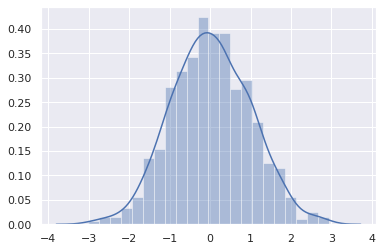

In [129]:
sns.distplot(x);

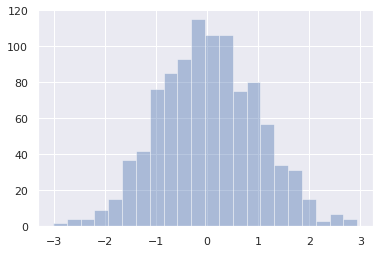

In [130]:
sns.distplot(x, kde=False);

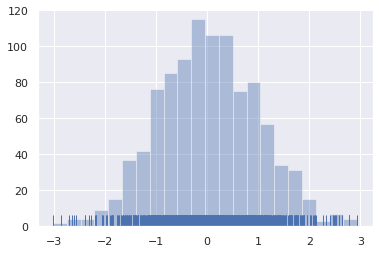

In [131]:
sns.distplot(x, kde=False, rug=True);

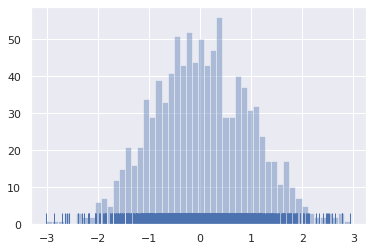

In [132]:
sns.distplot(x, kde=False, rug=True, bins=50);

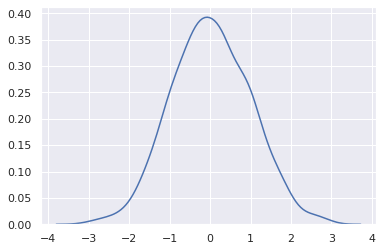

In [133]:
sns.kdeplot(x);

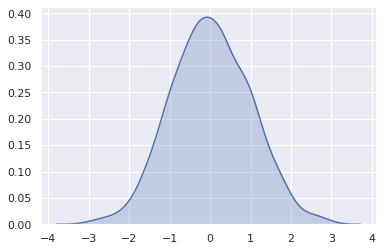

In [134]:
sns.kdeplot(x, shade=True);

In [135]:
y = np.random.uniform(size=1000)

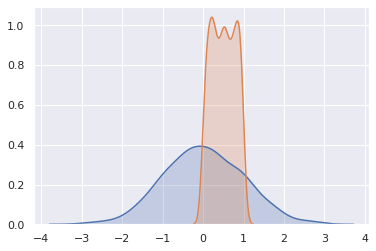

In [136]:
sns.kdeplot(x, shade=True);
sns.kdeplot(y, shade=True);

In [137]:
d = sns.load_dataset('diamonds')

In [138]:
print(type(d))

<class 'pandas.core.frame.DataFrame'>


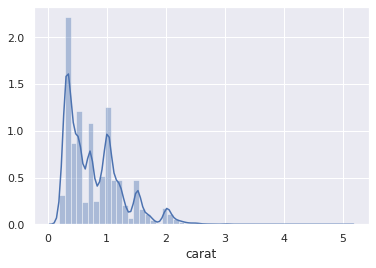

In [139]:
sns.distplot(d.carat)

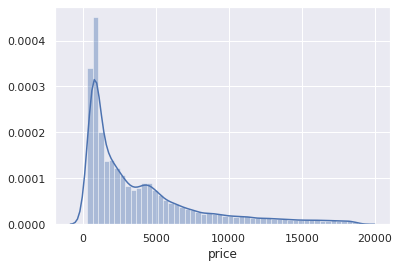

In [140]:
sns.distplot(d.price)

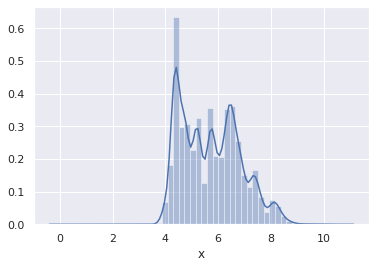

In [141]:
sns.distplot(d['x'])

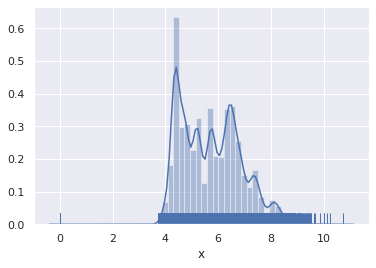

In [142]:
sns.distplot(d['x'], rug=True)

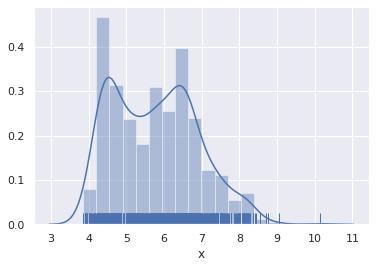

In [143]:
sns.distplot(d.sample(1000).x, rug=True)

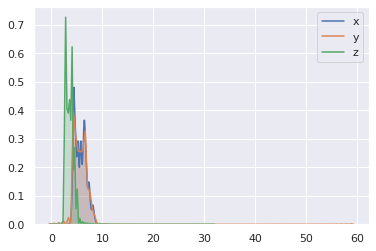

In [144]:
sns.kdeplot(d.x, shade=True)
sns.kdeplot(d.y, shade=True)
sns.kdeplot(d.z, shade=True)

### Boxplot

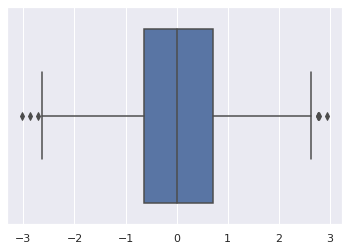

In [145]:
sns.boxplot(x)

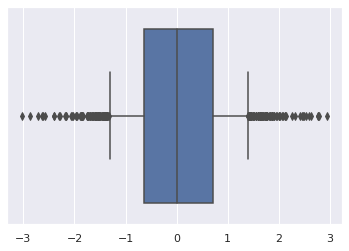

In [146]:
sns.boxplot(x, whis=0.5)

In [147]:
x = np.random.uniform(size=1000)

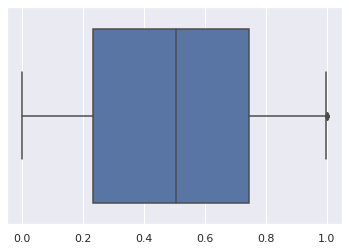

In [148]:
sns.boxplot(x, whis=0.5)

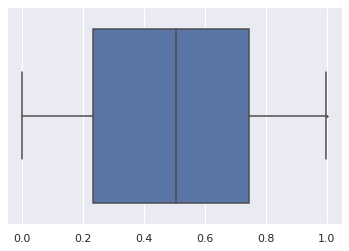

In [149]:
sns.boxplot(x, whis=0.5, fliersize=1)

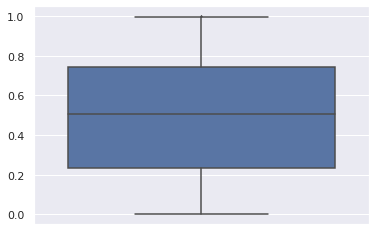

In [150]:
sns.boxplot(x, whis=0.5, fliersize=1, orient='v')

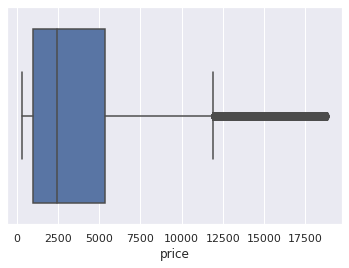

In [151]:
sns.boxplot(d.price)

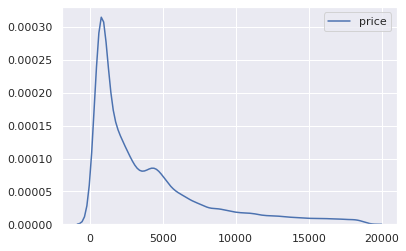

In [152]:
sns.kdeplot(d.price)

## Distribution of Categorical Data

## Bar plots

In [153]:
d.groupby('cut').count()

,carat,color,clarity,depth,table,price,x,y,z
cut,,,,,,,,,
Fair,1610,1610,1610,1610,1610,1610,1610,1610,1610
Good,4906,4906,4906,4906,4906,4906,4906,4906,4906
Ideal,21551,21551,21551,21551,21551,21551,21551,21551,21551
Premium,13791,13791,13791,13791,13791,13791,13791,13791,13791
Very Good,12082,12082,12082,12082,12082,12082,12082,12082,12082


In [154]:
c = d.groupby('cut')['cut'].count()

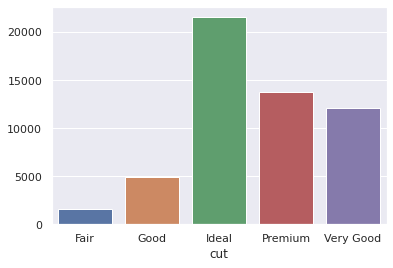

In [155]:
sns.barplot(x=c.index, y=c.values)

In [156]:
c = d.groupby('clarity')['clarity'].count()

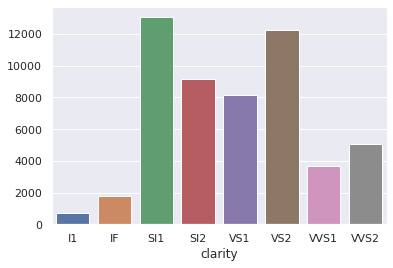

In [157]:
sns.barplot(x=c.index, y=c.values)

In [158]:
c = d.groupby('color')['color'].count()

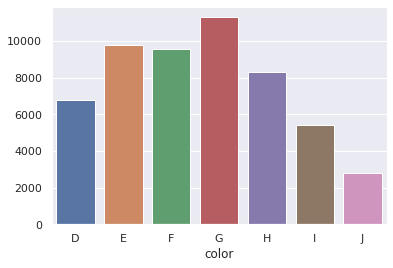

In [159]:
sns.barplot(x=c.index, y=c.values)

## Joint Distribution of Values

In [160]:
x = np.random.normal(size=1000)
y = np.random.normal(size=1000)

In [161]:
df = pd.DataFrame({'x':x, 'y':y})

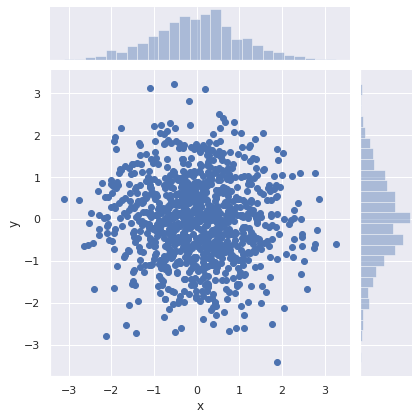

In [162]:
sns.jointplot(df.x,df.y)

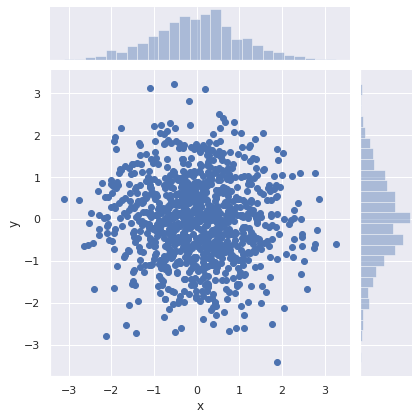

In [163]:
sns.jointplot('x','y', data=df)

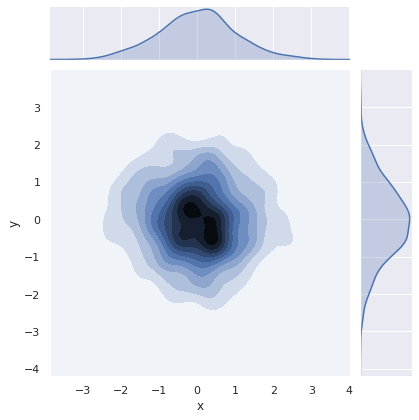

In [164]:
sns.jointplot('x','y', data=df, kind='kde')

In [165]:
x = np.random.normal(size=1000)
y = 3*x + np.random.normal(size=1000)/5

In [166]:
df = pd.DataFrame({'x':x, 'y':y})

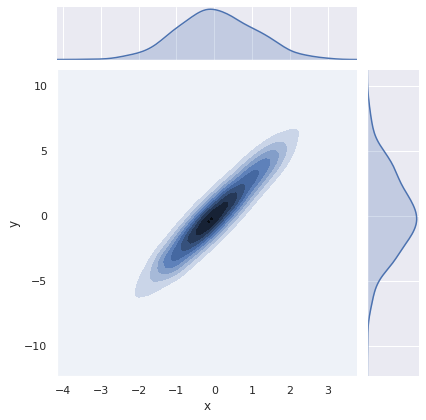

In [167]:
sns.jointplot('x','y', data=df, kind='kde')

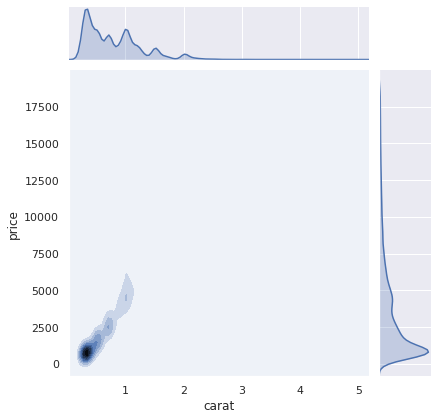

In [168]:
sns.jointplot('carat','price', data=d, kind='kde')

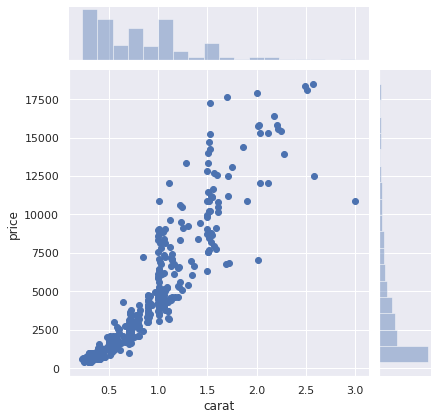

In [169]:
sns.jointplot('carat','price', data=d.sample(500))

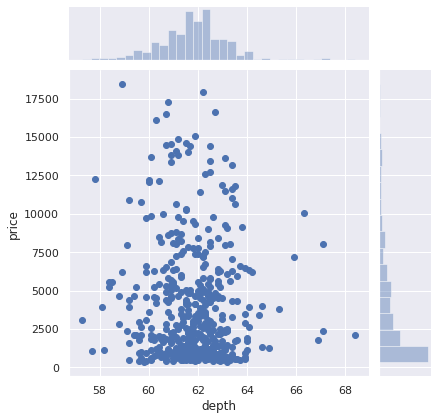

In [170]:
sns.jointplot('depth','price', data=d.sample(500))

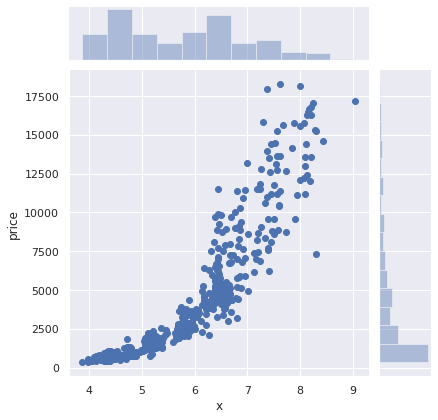

In [171]:
sns.jointplot('x','price', data=d.sample(500))

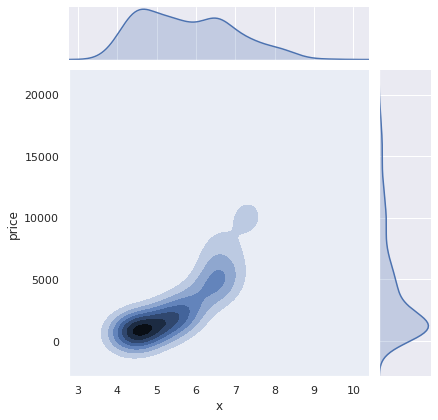

In [172]:
sns.jointplot('x','price', data=d.sample(500), kind='kde')

##Swarm Plot

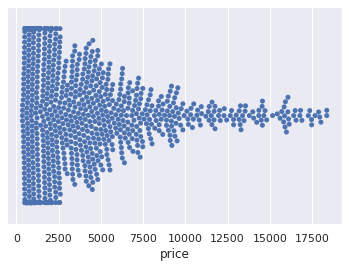

In [173]:
sns.swarmplot(d.sample(1000).price)

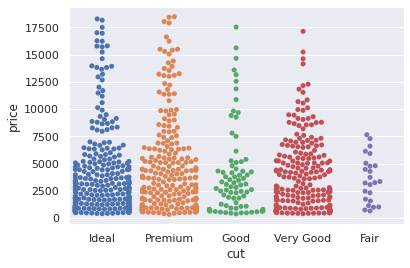

In [174]:
sns.swarmplot(x='cut', y='price', data=d.sample(1000))

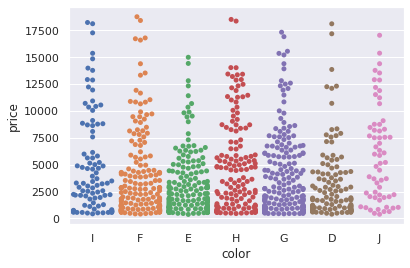

In [175]:
sns.swarmplot(x='color', y='price', data=d.sample(1000))

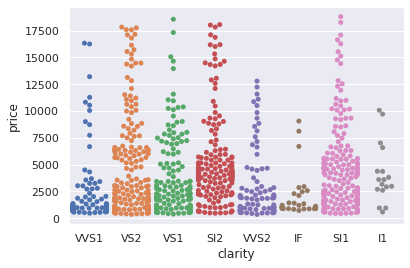

In [176]:
sns.swarmplot(x='clarity', y='price', data=d.sample(1000))

In [179]:
p = sns.load_dataset('penguins')

In [180]:
p

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


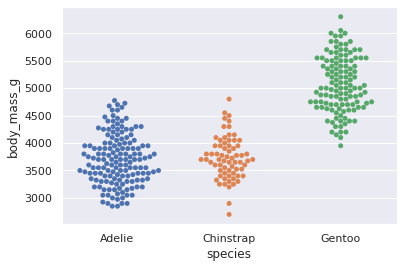

In [182]:
sns.swarmplot(x='species', y='body_mass_g', data=p)

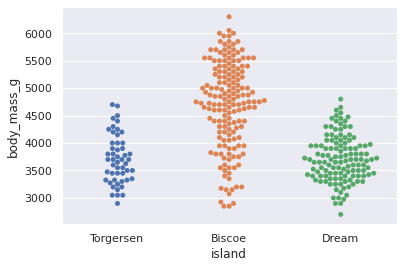

In [183]:
sns.swarmplot(x='island', y='body_mass_g', data=p)

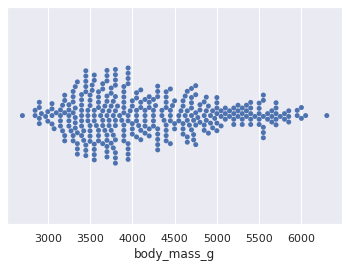

In [184]:
sns.swarmplot(x='body_mass_g', data=p)

##violin Plot

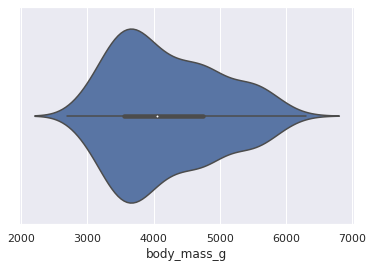

In [185]:
sns.violinplot(x='body_mass_g', data=p)

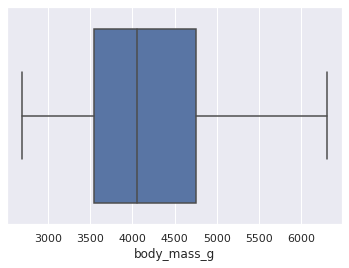

In [186]:
sns.boxplot(x='body_mass_g', data=p)

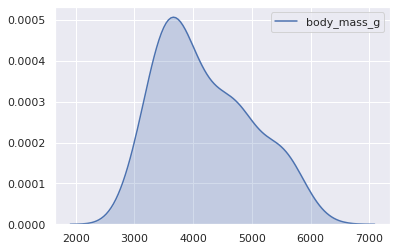

In [189]:
sns.kdeplot(p['body_mass_g'], shade=True)

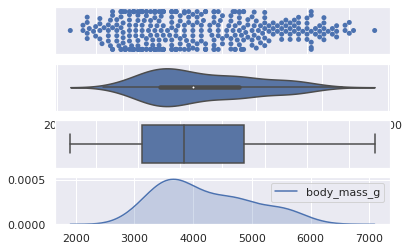

In [190]:
fig,axis = plt.subplots(nrows=4)
sns.swarmplot(x='body_mass_g', data=p, ax=axis[0])
sns.violinplot(x='body_mass_g', data=p,ax=axis[1])
sns.boxplot(x='body_mass_g', data=p,ax=axis[2])
sns.kdeplot(p['body_mass_g'], shade=True,ax=axis[3])

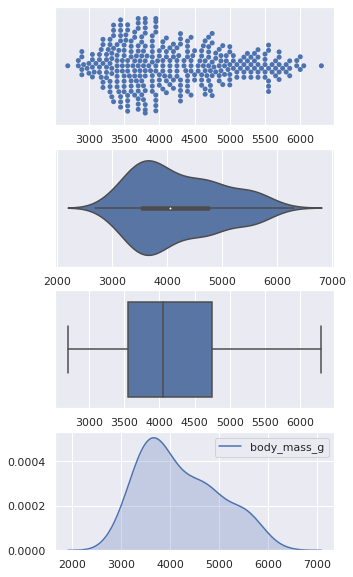

In [191]:
fig,axis = plt.subplots(nrows=4)
fig.set_size_inches(5,10)
sns.swarmplot(x='body_mass_g', data=p, ax=axis[0])
sns.violinplot(x='body_mass_g', data=p,ax=axis[1])
sns.boxplot(x='body_mass_g', data=p,ax=axis[2])
sns.kdeplot(p['body_mass_g'], shade=True,ax=axis[3])

[(2000.0, 7000.0)]

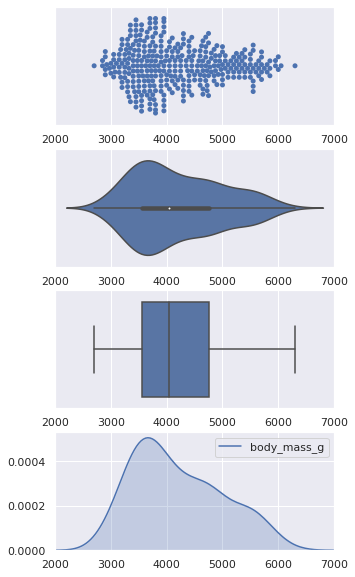

In [192]:
fig,axis = plt.subplots(nrows=4)
fig.set_size_inches(5,10)
p1 = sns.swarmplot(x='body_mass_g', data=p, ax=axis[0])
p1.set(xlim=(2000,7000))
p2=sns.violinplot(x='body_mass_g', data=p,ax=axis[1])
p2.set(xlim=(2000,7000))
p3=sns.boxplot(x='body_mass_g', data=p,ax=axis[2])
p3.set(xlim=(2000,7000))
p4=sns.kdeplot(p['body_mass_g'], shade=True,ax=axis[3])
p4.set(xlim=(2000,7000))